# A basic lsdtopotools analysis

Written by Simon M. Mudd at the University of Edinburgh. Updated 02/09/2021

We assume you are in our docker container. 

This includes `lsdviztools` and `lsdparamselector`.

If you are not in our docker container you will need to pip install these packages. 

In [1]:
import lsdviztools.lsdbasemaptools as bmt
from lsdviztools.lsdplottingtools import lsdmap_gdalio as gio
import lsdviztools.lsdmapwrappers as lsdmw
import lsdttparamselector as ps

## Part 1: grab data

First, we need to grab some data. We use a tool in `lsdviztools.lsdbasemaptools` called the `ot_scraper` (`ot` is for opentopography.org).

You can tell this what sort of data you want (most people will use the SRTM 30 metre data) and you also tell it the lower left and the upper right corners, using latitude and longitude. You can get these from goole earth by right clickjing on the map and selecting "what's here". In this example I use a place near Santa Barbara, California. 

In [2]:
SB_DEM = bmt.ot_scraper(source = "SRTM30",longitude_W = -120.464655, longitude_E = -120.254214, latitude_S = 34.440538, latitude_N = 34.610770,prefix = "lg_conception")
SB_DEM.print_parameters()

The source is: SRTMGL1
The west longitude is: -120.464655
The east longitude is: -120.254214
The south latitude is: 34.61077
The north latitude is: 34.440538
The path is: ./
The prefix is: lg_conception
The resolution is: 30


Okay, we haven't actually got any data. We need to do that by using the `download_pythonic` option. When it is finished it will say `finished downloading`. 

In [3]:
SB_DEM.download_pythonic()

I am going to download the following for you:
https://portal.opentopography.org/API/globaldem?demtype=SRTMGL1&south=34.440538&north=34.61077&west=-120.464655&east=-120.254214&outputFormat=GTiff
This might take a little while, depending on the size of the file. 
The filename will be:
./lg_conception_SRTMGL1.tif
The path and file without path are:
./  lg_conception_SRTMGL1.tif
Finished downloading


('./lg_conception_SRTMGL1.tif', './', 'lg_conception_SRTMGL1.tif')

Okay, now we need to do two things. First, we need to convert to UTM. Then we need to convert to ENVI bil format. 

In [4]:
SB_DEM.to_UTM_pythonic()
RasterFile = "lg_conception_SRTM30_UTM.tif"
DataDirectory = "./"
gio.convert2bil(DataDirectory, RasterFile,minimum_elevation=0)

The projections is:
GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]
And some extra projection information strings:
None
WGS 84
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -32768.0, 'width': 758, 'height': 613, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.0002777777777778146, 0.0, -120.46486111110323,
       0.0, -0.0002777777777778146, 34.61097222221886)}
res tuple is:
(30.0, 30.0)
The destination CRS is: EPSG:32610
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -32768.0, 'width': 661, 'height': 647, 'count': 1, 'crs': CRS.from_epsg(32610), 'transform': Affine(30.0, 0.0, 732452.2754693646,
       0.0, -30.0, 3833330.7356094)}
Removing pixels with an elevation less than 0


Okay, we now have an ENVI bil DEM. We are ready to start doing topographic analysis!

# Part 2: Topographic analysis

Now, that we have the data, we need to use an `lsdttparamselector` object to select parameters. The current default is to initiate a selector using the command line tool `lsdtt-basic-metrics`.

In [5]:
param = ps.lsdttdm()

You have selected the command line tool: lsdtt-basic-metrics
I am creating a lsdtt-basic-metrics input menu
Okay, your input widget is initiated. Call grab_widget to start entering parameters.
When you have finished, run the read_widgets tool.
This will give you a dictionary that can be passed to an lsdtt_driver object .


Okay, now lets initiate the widget and then call it to enter the parameters we want.

In [6]:
tab_nest = param.make_widget()
tab_nest

Now that we have done that, we grab the parameter values. 

In [7]:
parameter_dict = param.read_widgets()
print(parameter_dict)

{'minimum_elevation': '0.0', 'maximum_elevation': '30000.0', 'min_slope_for_fill': '0.0001', 'raster_is_filled': 'false', 'remove_seas': 'true', 'carve_before_fill': 'false', 'only_check_parameters': 'false', 'write_hillshade': 'false', 'print_raster_without_seas': 'false', 'print_distance_from_outlet': 'false', 'print_fill_raster': 'false', 'print_relief_raster': 'false', 'relief_window': '200.0', 'remove_nodes_influenced_by_edge': 'false', 'isolate_pixels_draining_to_fixed_channel': 'false', 'fixed_channel_csv_name': 'single_channel_nodes', 'print_trimmed_raster': 'false', 'trimming_buffer_pixels': '0', 'convert_csv_to_geojson': 'false', 'burn_raster_to_csv': 'false', 'burn_raster_prefix': 'NULL', 'burn_data_csv_column_header': 'burned_data', 'csv_to_burn_name': 'NULL', 'calculate_window_size': 'false', 'surface_fitting_radius': '30.0', 'print_slope': 'false', 'print_aspect': 'false', 'print_curvature': 'false', 'print_planform_curvature': 'false', 'print_profile_curvature': 'false',

Okay, now we initiate an `lsdtt_driver` object, which handles the call to `lsdtt-basic-metrics`.

In [8]:
lsdtt_drive = lsdmw.lsdtt_driver(read_prefix = "lg_conception_SRTM30_UTM",write_prefix= "lg_conception_SRTM30_UTM",parameter_dictionary=parameter_dict)
lsdtt_drive.print_parameters()

The lsdtopotools command line tools available are: 
['lsdtt-basic-metrics', 'lsdtt-channel-extraction', 'lsdtt-chi-mapping', 'lsdtt-cosmo-tool', 'lsdtt-hillslope-channel-coupling']
Please note only lsdtt-basic-metrics has been fully tested
The command line tool is: lsdtt-basic-metrics
The driver name is: Test_01
The read path is: ./
The write path is: ./
The read prefix is: lg_conception_SRTM30_UTM
The write prefix is: lg_conception_SRTM30_UTM
The parameter dictionary is:
{'minimum_elevation': '0.0', 'maximum_elevation': '30000.0', 'min_slope_for_fill': '0.0001', 'raster_is_filled': 'false', 'remove_seas': 'true', 'carve_before_fill': 'false', 'only_check_parameters': 'false', 'write_hillshade': 'false', 'print_raster_without_seas': 'false', 'print_distance_from_outlet': 'false', 'print_fill_raster': 'false', 'print_relief_raster': 'false', 'relief_window': '200.0', 'remove_nodes_influenced_by_edge': 'false', 'isolate_pixels_draining_to_fixed_channel': 'false', 'fixed_channel_csv_name'

Now run the tool!

In [9]:
lsdtt_drive.run_lsdtt_command_line_tool()

Done writing the driver file
I've finised writing the driver file. Let me run LSDTT for you.
|| Welcome to the LSDTopoTools basic metrics tool!     ||
|| This program has a number of options for calculating||
|| simple landscape metrics.                           ||
|| This program was developed by Simon M. Mudd         ||
||  at the University of Edinburgh                     ||
|| If you use these routines please cite:              ||
|| https://www.doi.org/10.5281/zenodo.2560223          ||
|| If you use the roughness routine please cite:       ||
|| https://www.doi.org/10.5194/esurf-3-483-2015        ||
|| Documentation can be found at:                      ||
|| https://lsdtopotools.github.io/LSDTT_documentation/ ||
|| You have called an LSDTopoTools program.            ||
|| Prepare to explore topographic data!                ||
|| You can read the documentation at:                  ||
I have one argument. I don't know if this is a directory path
or a driver filename. I am going 

Read filename is: ./lg_conception_SRTM30_UTM
Write filename is: ./lg_conception_SRTM30_UTM
Data Type = 4
I am removing high and low values to get rid of things that should be nodata.
Got the dem: ./lg_conception_SRTM30_UTM
I won't be doing any polyfitting so you have saved yourself some time!
I'm all finished! Have a nice day.


Super. We will now have a bunch of rasters and csv data ready for visualisation. 

# Part 3: plot some data

Okay, now that we have some rasters, we can use lsdviztools to plot some data. First let's do a hillshade plot. We'll use a `gist_earth` colourmap. This makes an image file (that you can use later). 

In [10]:
DataDirectory = "./"
Base_file = "lg_conception_SRTM30_UTM"
    
img_name = lsdmw.SimpleHillshade(DataDirectory,Base_file,cmap="gist_earth")

Your colourbar will be located: right
xsize: 661 and y size: 647
NoData is: -9999.0
Yoyoyoyo the EPSG is :EPSG:32610
EPSG:32610
The EPSGString is: EPSG:32610
minimum values are x: 732452.0 and y: 3813920.0
I made the ticks.
x labels are: 
['735', '738', '741', '744', '747', '750']
x locations are:
[735000.0, 738000.0, 741000.0, 744000.0, 747000.0, 750000.0]
y labels are: 
['3816', '3819', '3822', '3825', '3828', '3831']
y locations are:
[3816000.0, 3819000.0, 3822000.0, 3825000.0, 3828000.0, 3831000.0]
This colourmap is: gray
The number of axes are: 1
Axes(0,0;1x1)
Axes(0,0;1x1)
N axes are: 1
Axes(0,0;1x1)
xsize: 661 and y size: 647


/usr/local/lib/python3.8/site-packages/lsdviztools/lsdmapfigure/plottingraster.py:422: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(self.tick_x_labels)
/usr/local/lib/python3.8/site-packages/lsdviztools/lsdmapfigure/plottingraster.py:423: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(self.tick_y_labels)


NoData is: -9999.0
Yoyoyoyo the EPSG is :EPSG:32610
EPSG:32610
The EPSGString is: EPSG:32610
I am going to use the normalisation None
I am using the full range of values in the raster.
The number of axes are: 2
The aspect ratio is: 1.0216383307573416
I need to adjust the spacing of the colourbar.
You have a colourbar on the left or right, I need to check the number of characters in the labels.
['', '', '']
The longest colourbar label has 0 characters.
The cbar characters are: 0 and the cbar text width is: 0.4
cbar_left: 4.1212599999999995 map left: 0.8500000000000001
cbar_bottom: 0.65 map bottom: 0.65
The figure size is: 
[4.92126, 3.9540926172465958]
Map axes are:
[0.1727199944729602, 0.16438664010167342, 0.6444000113791996, 0.7850328552516578]
cbar_axes are:
[0.8374400052019197, 0.16438664010167342, 0.04063999869952004, 0.7850328552516578]
Number of axes are: 2


/usr/local/lib/python3.8/site-packages/lsdviztools/lsdmapfigure/plottingraster.py:1169: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = plt.colorbar(im,cmap=BaseRaster._colourmap,spacing='uniform', orientation=self.colourbar_orientation,cax=ax_list[-1],drawedges=False)
findfont: Font family ['Liberation Sans'] not found. Falling back to DejaVu Sans.


I'm returning:
./lg_conception_SRTM30_UTM_hillshade.png


We render the code with a markdown call (it looks like this `<img src="lg_conception_SRTM30_UTM_hillshade.png" width=600>`)

In [11]:
img_name

'./lg_conception_SRTM30_UTM_hillshade.png'

We can display this image

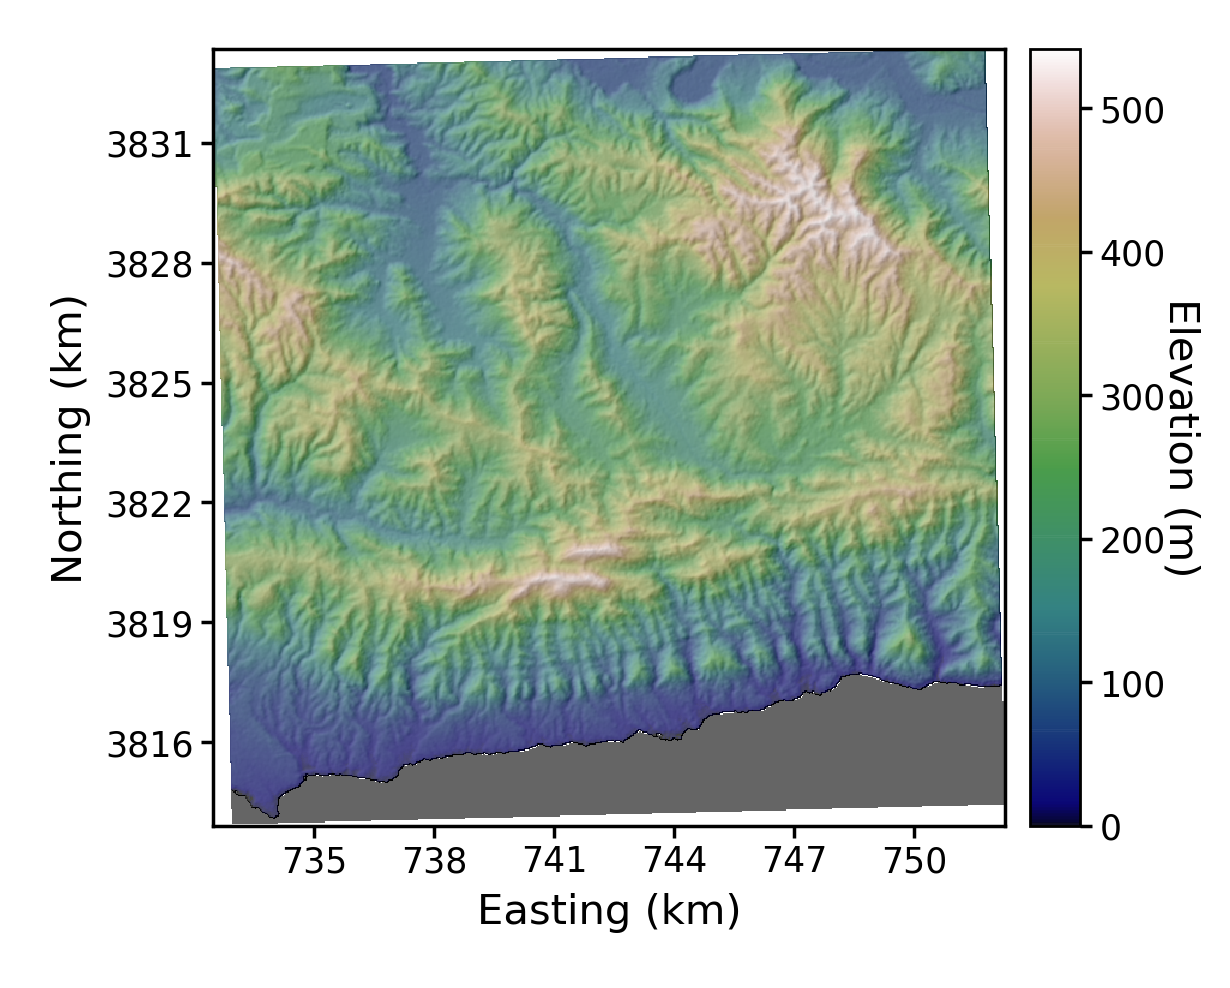

In [13]:
from IPython.display import Image
Image(filename=img_name,width=800) 

Now lets print the slope map

In [14]:
Drape_prefix = "lg_conception_SRTM30_UTM_SLOPE"
img_name2 = lsdmw.SimpleDrape(DataDirectory,Base_file, Drape_prefix, cmap = "gnuplot", cbar_loc = "right", cbar_label = "Gradient (m/m)")

Your colourbar will be located: right
xsize: 661 and y size: 647
NoData is: -9999.0
Yoyoyoyo the EPSG is :EPSG:32610
EPSG:32610
The EPSGString is: EPSG:32610
minimum values are x: 732452.0 and y: 3813920.0
I made the ticks.
x labels are: 
['735', '738', '741', '744', '747', '750']
x locations are:
[735000.0, 738000.0, 741000.0, 744000.0, 747000.0, 750000.0]
y labels are: 
['3816', '3819', '3822', '3825', '3828', '3831']
y locations are:
[3816000.0, 3819000.0, 3822000.0, 3825000.0, 3828000.0, 3831000.0]
This colourmap is: gray
The number of axes are: 1
Axes(0,0;1x1)
Axes(0,0;1x1)
N axes are: 1
Axes(0,0;1x1)
xsize: 661 and y size: 647
NoData is: -9999.0
Yoyoyoyo the EPSG is :EPSG:32610
EPSG:32610
The EPSGString is: EPSG:32610
I am going to use the normalisation None
I am using the full range of values in the raster.
The number of axes are: 2
The aspect ratio is: 1.0216383307573416
I need to adjust the spacing of the colourbar.
You have a colourbar on the left or right, I need to check th

In [15]:
img_name2

'./lg_conception_SRTM30_UTM_drape.png'

<img src="lg_conception_SRTM30_UTM_drape.png" width=600>

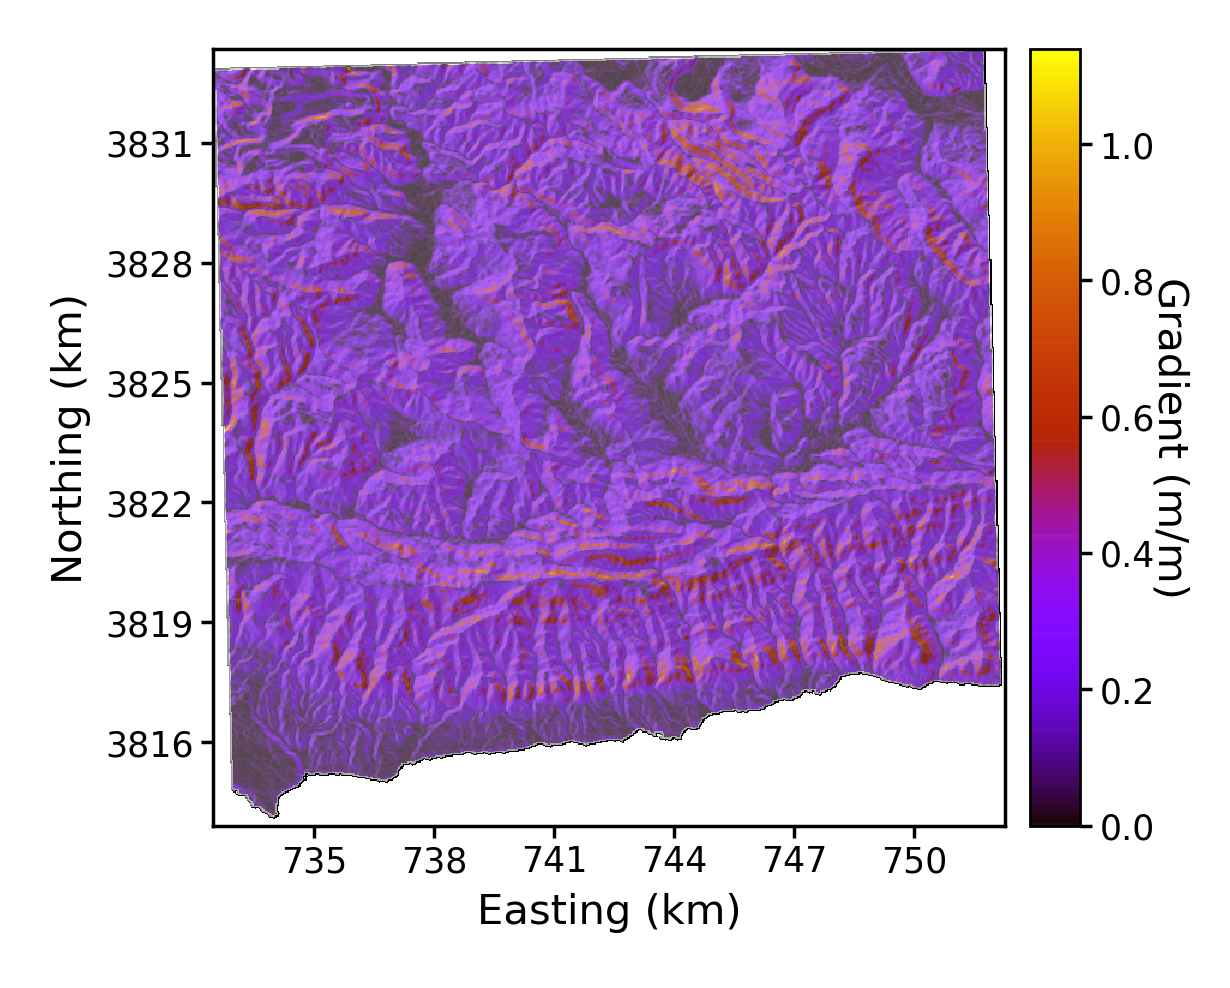

In [16]:
from IPython.display import Image
Image(filename=img_name2,width=800) 